<a href="https://colab.research.google.com/github/phuongnt3391/KMeansClustering/blob/main/KMeansCLustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the libraries


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [31]:
import seaborn as sns

Import the dataset



In [32]:
df = pd.read_csv('Mall_Customers.csv')

In [33]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Visualize the data to explore if there is any significant trend, to have more insights into the data

In [35]:
df['Genre'].unique()

array(['Male', 'Female'], dtype=object)

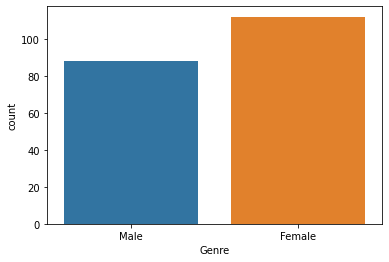

In [36]:
sns.countplot(data=df,x='Genre')

More Female customers shop at the mall than male customers

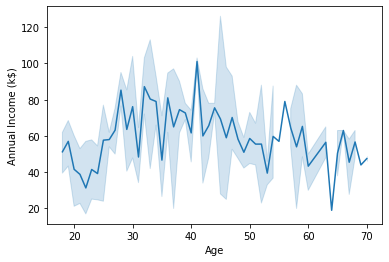

In [37]:
sns.lineplot(data=df,x='Age',y='Annual Income (k$)')

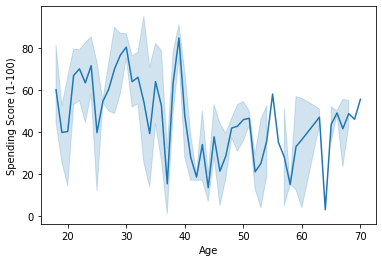

In [38]:
sns.lineplot(data=df,x='Age',y='Spending Score (1-100)')

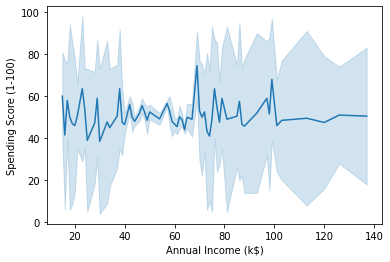

In [39]:
sns.lineplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

Choose only 2 features: Annual income and Spending score

In [40]:
X = df.iloc[:,3:].values

Feature Scaling

Using Elbow method to choose the optimal k number of clusters


In [86]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_) 
print(wcss)

[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37265.86520484347, 30241.34361793659, 25336.946861471864, 21850.165282585633, 19634.55462934998]


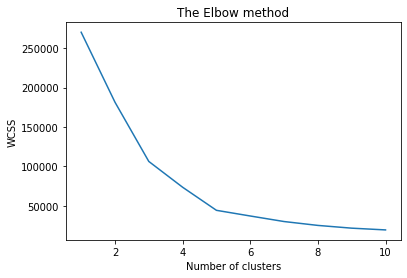

In [87]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

Choose k = 5 as after 5, the WCSS does not decrease significantly

Training the K-Means model on the dataset

In [93]:
model = KMeans(n_clusters=5,init = 'k-means++', random_state = 42)

cluster_label = model.fit_predict(X)
df['Cluster'] = cluster_label
print(cluster_label)


[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


Visualize the importances of particular features to a cluster assignment

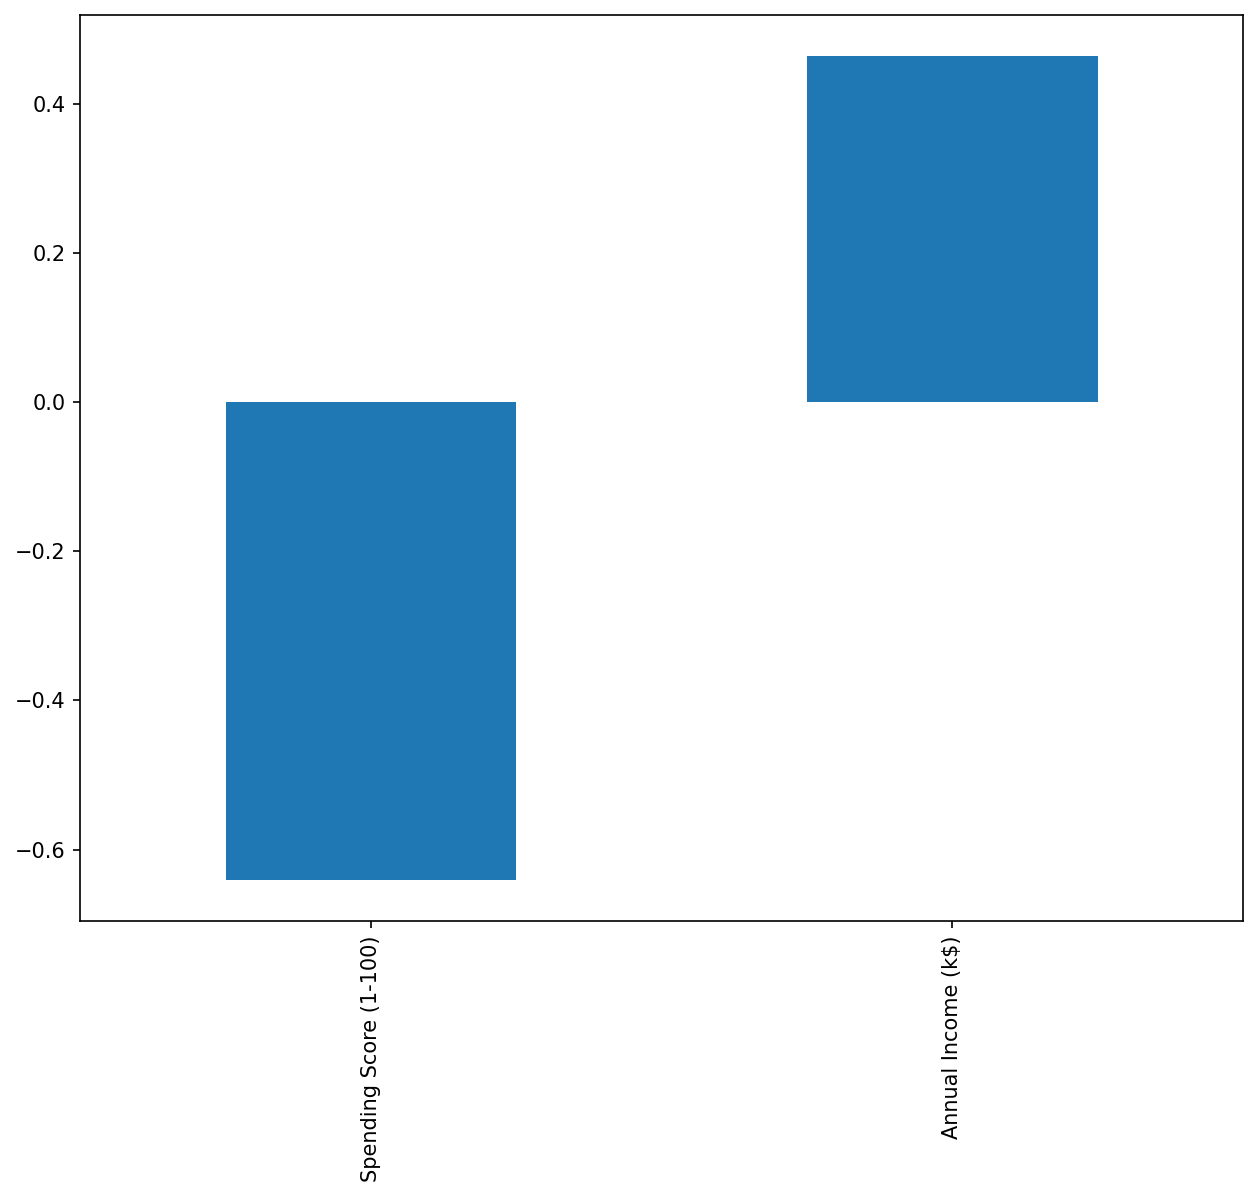

In [94]:
plt.figure(figsize=(10,8),dpi=150)
df.drop(['CustomerID','Genre','Age'],axis=1).corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

In [95]:
pd.Series(wcss)
pd.Series(wcss).diff()

0             NaN
1   -88617.684040
2   -75015.222897
3   -32668.584023
4   -29231.333592
5    -7182.590243
6    -7024.521587
7    -4904.396756
8    -3486.781579
9    -2215.610653
dtype: float64

Visualizing the clusters

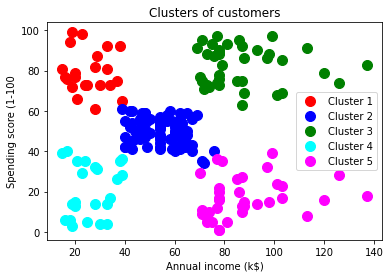

In [99]:
plt.scatter(X[cluster_label ==0,0],X[cluster_label ==0,1],s=100,c='red',label ='Cluster 1')
plt.scatter(X[cluster_label ==1,0],X[cluster_label ==1,1],s=100,c='blue',label ='Cluster 2')
plt.scatter(X[cluster_label ==2,0],X[cluster_label ==2,1],s=100,c='green',label ='Cluster 3')
plt.scatter(X[cluster_label ==3,0],X[cluster_label ==3,1],s=100,c='cyan',label ='Cluster 4')
plt.scatter(X[cluster_label ==4,0],X[cluster_label ==4,1],s=100,c='magenta',label ='Cluster 5')
##plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],s=300, c='yellow',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score (1-100')
plt.legend()
plt.show()